# Cluster analysis according to crime in US states
**The work is about performing a cluster analysis to generate homogeneous groups of US states
according to indicators of crimes committed in said states. Problems to solve:**
<p>1. Standardize the database variables and rename them to work with the standardized database in the future.<p>
<p>2. Generate the distance matrix between the states according to the 4 crime indexes contained in the database. Use the Euclidean distance measure for this. Plot the distance matrix in three colors to distinguish states that are closer and further away.<p>
<p>3. Using the function fviz_nbclust() generate the graphs to decide the number of optimal groups according to the k-means method according to Elbow (wss), silhouette and statistical gap criteria.<p>
<p>4. Using the NbClust() function, generate a graph with the summary of how many criteria are inclined for each number of groups between 2 and 10 groups, according to the k-means method.<p>
<p>5. Generate a clustering plot with bivariate normal confidence ellipses, for 2 clusters using the k-means method.<p>
<p>6. Generate a clustering plot with bivariate normal confidence ellipses, for 4 clusters using the k-means method.<p>
<p>7. Generate a dendrogram plot for 2 clusters according to the hierarchical method by Ward's procedure (the one that comes by default).<p>
<p>8. Generate a dendrogram plot for 4 clusters according to the hierarchical method by Ward's procedure (the one that comes by default).<p>
<p>9. Generate the summary table of the internal validation statistics.<p>
<p>10. Generate the summary table of the stability statistics.<p>

<p>Install the package:<p>

In [2]:
install.packages("tidyverse", "psych", "apaTables", "corrr", "REdaS","factoextra", "ggthemes")

Set working directory:

In [3]:
setwd("C:/Users/Marco Labarca/Desktop/Proyectos/R - USArrests")

Open data file:

In [8]:
data(USArrests)
dfa<-scale(USArrests)
summary(dfa)

     Murder           Assault           UrbanPop             Rape        
 Min.   :-1.6044   Min.   :-1.5090   Min.   :-2.31714   Min.   :-1.4874  
 1st Qu.:-0.8525   1st Qu.:-0.7411   1st Qu.:-0.76271   1st Qu.:-0.6574  
 Median :-0.1235   Median :-0.1411   Median : 0.03178   Median :-0.1209  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.0000  
 3rd Qu.: 0.7949   3rd Qu.: 0.9388   3rd Qu.: 0.84354   3rd Qu.: 0.5277  
 Max.   : 2.2069   Max.   : 1.9948   Max.   : 1.75892   Max.   : 2.6444  

Euclidean distance matrix between the states according to the 4 types of crimes contained in the data:

In [14]:
library(ggplot2)
library(factoextra)

m.dist<- get_dist(dfa, method = "euclidean")
fviz_dist(m.dist, gradient = list(low = "blue", mid = "orange", high = "red"))

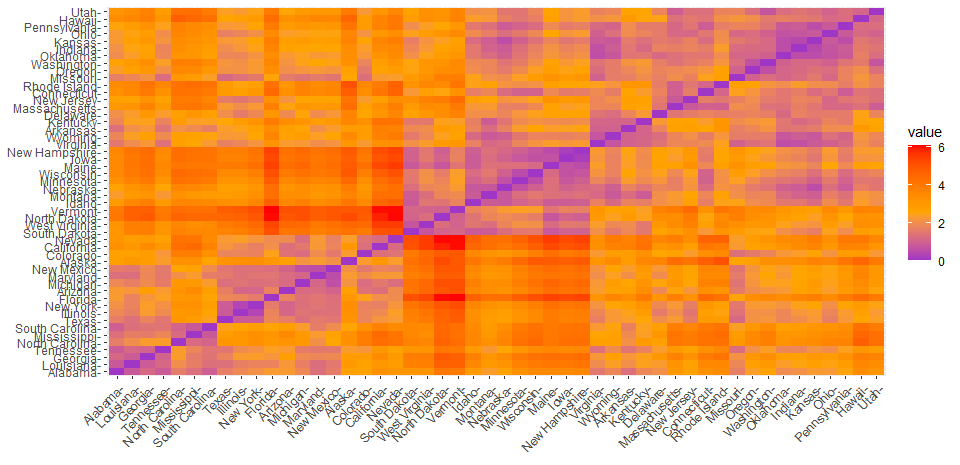

Graph of optimal number of groups according to the Elbow method (wss):

In [16]:
fviz_nbclust(dfa, kmeans, "wss")

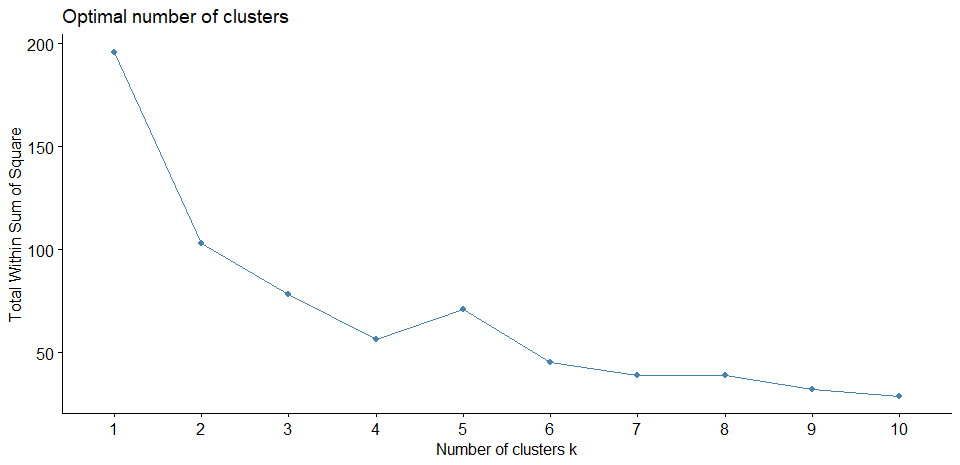

Graph of optimal number of groups according to the silhouette method:

In [18]:
fviz_nbclust(dfa, kmeans, "silhouette")

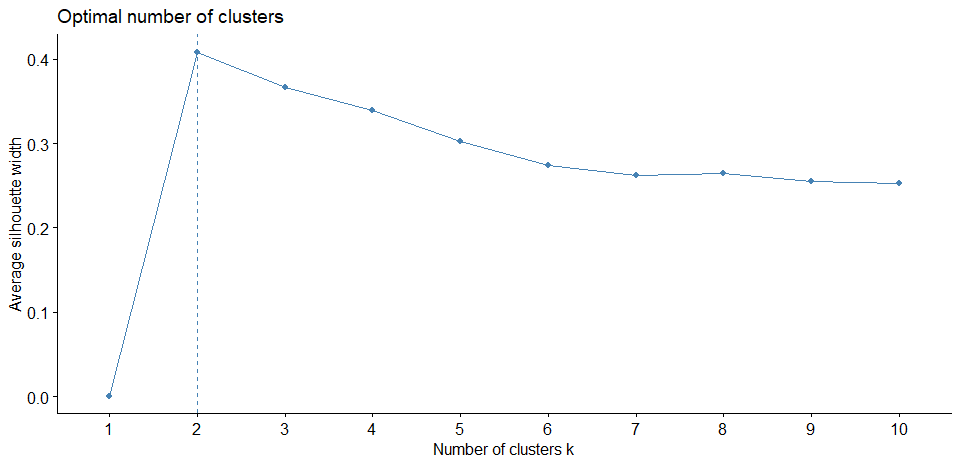

Graph of optimal number of groups according to the statistical gap method:

In [19]:
fviz_nbclust(dfa, kmeans, "gap_stat")

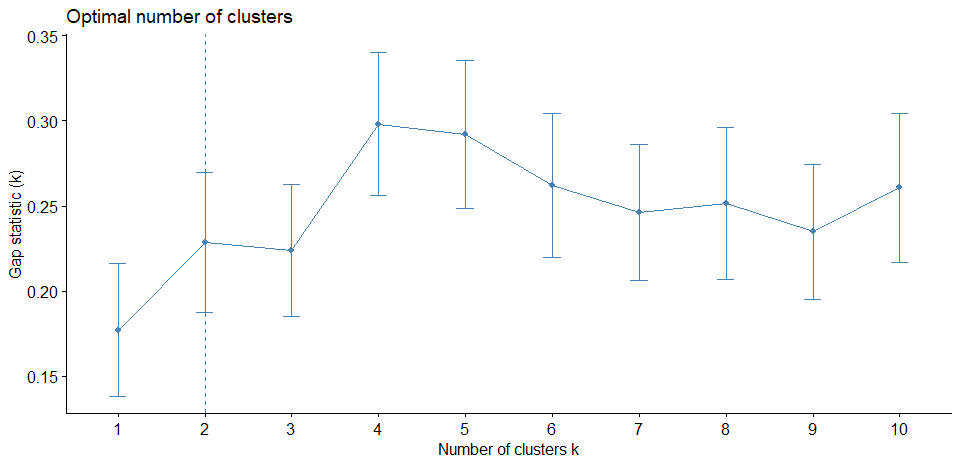

**Number of clusters based on multiple statistics**

Summary graph of how many criteria are inclined for each number of groups, between 2 and 10 groups, according to the k-means method.

In [21]:
numclust<-NbClust(dfa, distance = "euclidean", min.nc = 2, max.nc = 10, method = "kmeans", index="alllong")

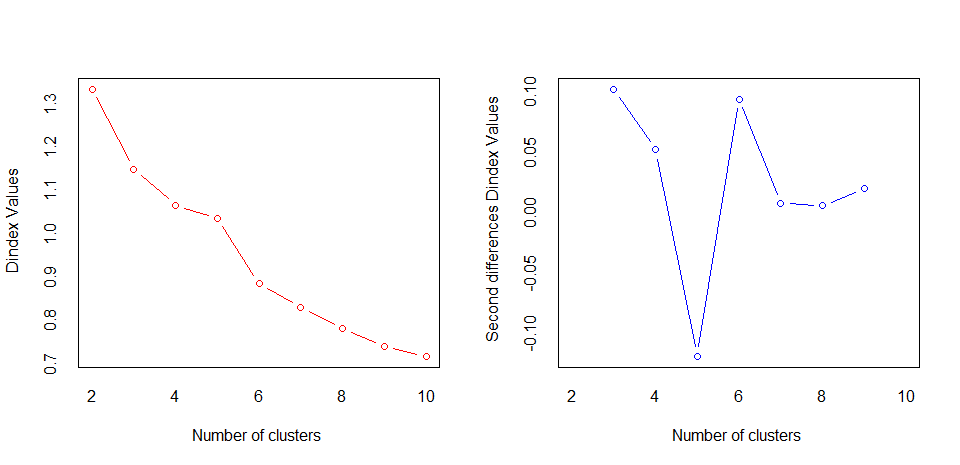

In [23]:
numclust

In [25]:
fviz_nbclust(numclust)

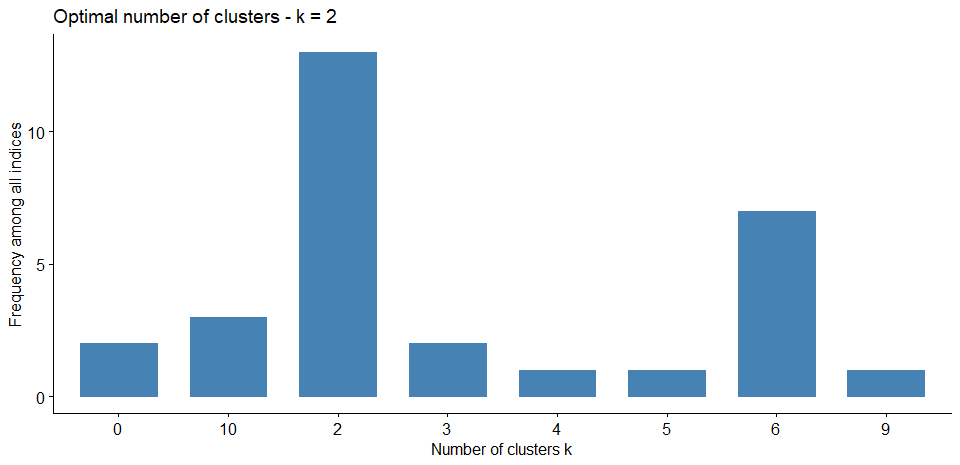

Clustering plot with bivariate normal confidence ellipses, for 2 clusters according to the k-means method.

In [27]:
km2<-kmeans(dfa, centers= 2, nstart = 25)
km2

K-means clustering with 2 clusters of sizes 30, 20

Cluster means:
     Murder    Assault   UrbanPop       Rape
1 -0.669956 -0.6758849 -0.1317235 -0.5646433
2  1.004934  1.0138274  0.1975853  0.8469650

Clustering vector:
       Alabama         Alaska        Arizona       Arkansas     California 
             2              2              2              1              2 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              1              1              2              2 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             1              1              2              1              1 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             1              1              2              1              2 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             1              2              1              2              2 
       Montana    

In [37]:
fviz_cluster(km2, dfa, ellipse.type = "euclid", repel=F , star.plot=T)

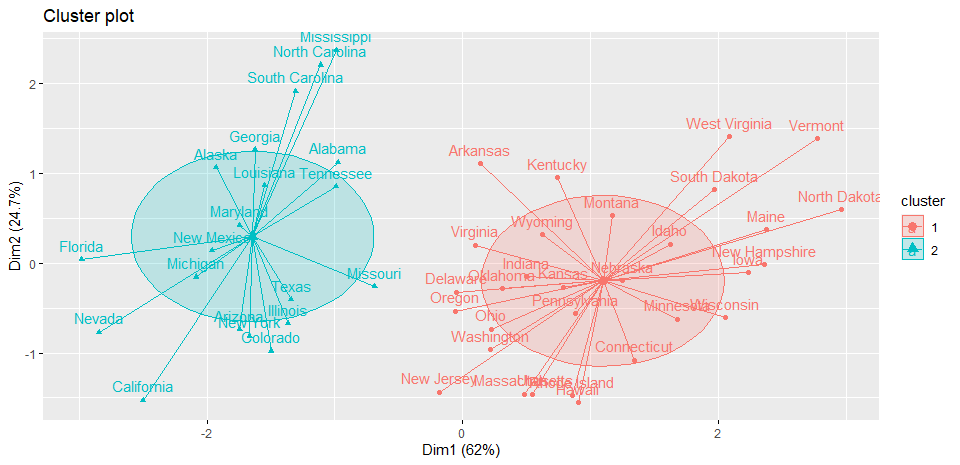

Gráfico de agrupamiento con elipses de confianza de normal bivariada, para 4 clústers según el 
método de las k-medias.

In [38]:
km4<-kmeans(dfa, centers= 4, nstart = 25)
km4

K-means clustering with 4 clusters of sizes 13, 8, 13, 16

Cluster means:
      Murder    Assault   UrbanPop        Rape
1  0.6950701  1.0394414  0.7226370  1.27693964
2  1.4118898  0.8743346 -0.8145211  0.01927104
3 -0.9615407 -1.1066010 -0.9301069 -0.96676331
4 -0.4894375 -0.3826001  0.5758298 -0.26165379

Clustering vector:
       Alabama         Alaska        Arizona       Arkansas     California 
             2              1              1              2              1 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             1              4              4              1              2 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             4              3              1              4              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             4              3              2              3              1 
 Massachusetts       Michigan      Minnesota    Mississippi    

In [ ]:
fviz_cluster(km4, dfa, ellipse.type = "euclid", repel=F , star.plot=T)

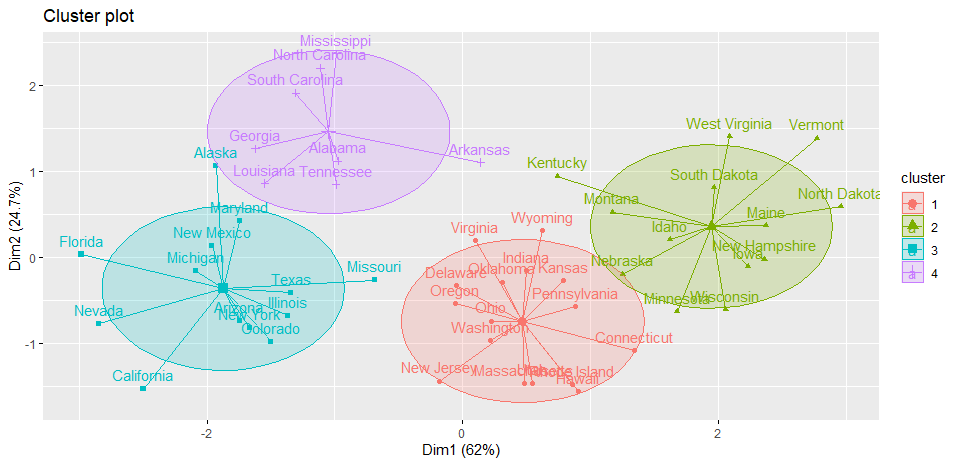

Dendrogram graph for 2 clusters according to the hierarchical method by Ward's procedure (the one that comes by default).

In [41]:
res2<-hcut(dfa, k=2, stand=F)
res2

In [43]:
fviz_dend(res2, cex=0.5, palette = "jco", rect=T, rct_fill=T, rect_border = "jco")

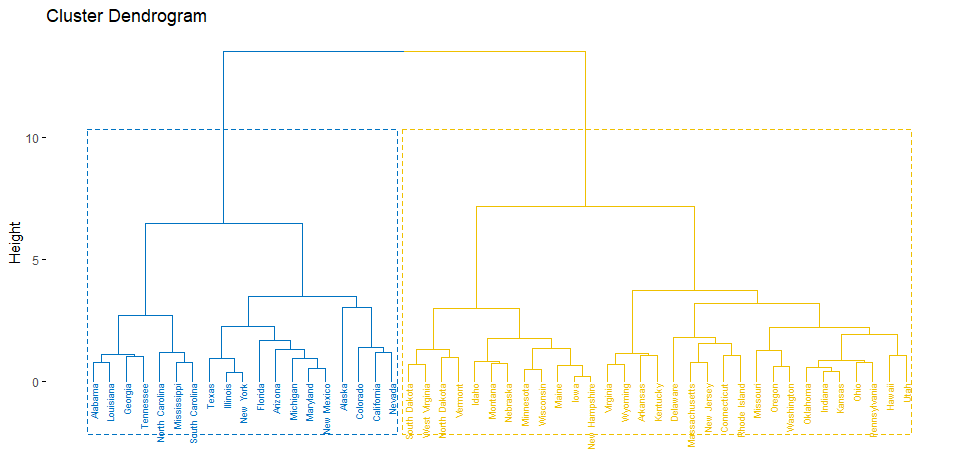

Dendrogram graph for 4 clusters according to the hierarchical method by Ward's procedure (the one that comes by default).

In [45]:
res4<-hcut(dfa, k=4)
fviz_dend(res4, cex=0.5, palette = "jco", rect=T, rct_fill=T, rect_border = "jco")

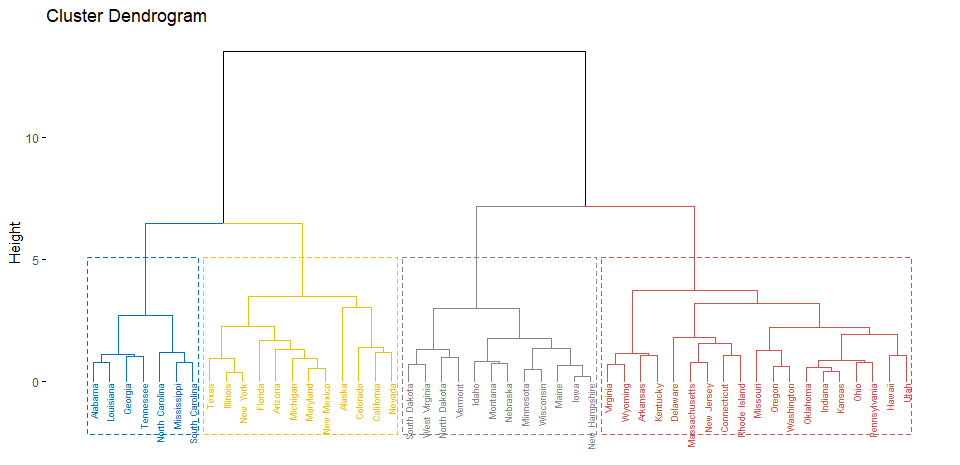

Summary table of internal validation statistics.

In [49]:
library(cluster)
library(clValid)
intern <- clValid(dfa, 2:10, clMethods=c("hierarchical","kmeans","pam"), validation="internal")
summary(intern)


Clustering Methods:
 hierarchical kmeans pam 

Cluster sizes:
 2 3 4 5 6 7 8 9 10 

Validation Measures:
                                 2       3       4       5       6       7       8       9      10
                                                                                                  
hierarchical Connectivity   6.6437  9.5615 13.9563 22.5782 31.2873 36.4230 41.6655 44.9595 49.4286
             Dunn           0.2214  0.2214  0.2224  0.2046  0.2126  0.2126  0.2509  0.2623  0.2623
             Silhouette     0.4085  0.3486  0.3637  0.3213  0.2720  0.2507  0.2208  0.2096  0.2161
kmeans       Connectivity   6.6437 13.6484 16.2413 24.6639 33.7194 39.4325 48.2508 51.5448 56.0139
             Dunn           0.2214  0.2224  0.2224  0.1983  0.2231  0.2272  0.1962  0.2101  0.2101
             Silhouette     0.4085  0.3668  0.3573  0.3377  0.3079  0.2936  0.2650  0.2524  0.2543
pam          Connectivity   6.6437 13.8302 20.4421 29.5726 38.2643 48.1250 51.0901 53.0234 57.9270
   

Summary table of stability statistics.

In [51]:
stab <- clValid(dfa, 2:10, clMethods=c("hierarchical","kmeans","pam"), validation="stability")
summary(stab)


Clustering Methods:
 hierarchical kmeans pam 

Cluster sizes:
 2 3 4 5 6 7 8 9 10 

Validation Measures:
                       2      3      4      5      6      7      8      9     10
                                                                                
hierarchical APN  0.0853 0.1456 0.1608 0.2239 0.2740 0.3066 0.3503 0.3578 0.3886
             AD   1.9637 1.9212 1.7373 1.5406 1.4999 1.4333 1.3674 1.3329 1.2798
             ADM  0.3079 0.4509 0.4828 0.5832 0.6971 0.7012 0.7050 0.7233 0.7386
             FOM  0.8252 0.8199 0.7740 0.7121 0.7106 0.6937 0.6681 0.6716 0.6739
kmeans       APN  0.0533 0.1820 0.3607 0.2077 0.2393 0.2322 0.3104 0.3791 0.3554
             AD   1.8891 1.8127 1.7144 1.4311 1.3715 1.3101 1.2916 1.2740 1.1894
             ADM  0.1652 0.5492 0.7949 0.4357 0.4934 0.5136 0.6405 0.6890 0.6489
             FOM  0.7506 0.8057 0.6895 0.6534 0.6877 0.6878 0.6740 0.6826 0.6548
pam          APN  0.0660 0.1562 0.2077 0.1824 0.2107 0.2203 0.2383 0.2405 0.2864
   